In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [20]:
DATA_PATH = '../data/auto_mpg_inputed.csv'
RANDOM_STATE=42

In [21]:
df = pd.read_csv(DATA_PATH)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,manufacturer,model
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick,skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth,satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc,rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford,torino


In [22]:
df = df.drop('model', axis=1)
df = pd.get_dummies(df, dtype=np.float64)

Separating train and test data

In [23]:
train = df.sample(frac=0.8, random_state=RANDOM_STATE)
test = df.drop(train.index)

x_train, y_train = train.drop('mpg', axis=1), train['mpg']
x_test, y_test = test.drop('mpg', axis=1), test['mpg']

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(318, 39)
(80, 39)
(318,)
(80,)


# Base model: linear regression

This will be the simplest model possible. From input to output layer, no hidden layers and linear activation function. Just a linear regression.

In [24]:
n_features_in = len(x_train.columns)
input_shape = (1, n_features_in)
input_shape

(1, 39)

In [25]:
model = tf.keras.Sequential()
model.add(keras.layers.InputLayer(input_shape))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1, 1)           │            40 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError()
    ],
)

In [27]:
history = model.fit(
    x=tf.expand_dims(x_train.values, axis=1),
    y=y_train.values,
    batch_size=30,
    epochs=10,
    verbose="auto",
    validation_split=0.2,
    shuffle=True
)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1047740.8750 - mean_absolute_error: 977.7936 - val_loss: 741293.3125 - val_mean_absolute_error: 831.9602
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 535169.6875 - mean_absolute_error: 696.7905 - val_loss: 300175.9688 - val_mean_absolute_error: 529.8466
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 203611.0312 - mean_absolute_error: 429.4207 - val_loss: 80947.2266 - val_mean_absolute_error: 275.5795
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48266.6172 - mean_absolute_error: 208.1740 - val_loss: 8960.9365 - val_mean_absolute_error: 91.5946
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4093.0515 - mean_absolute_error: 56.1407 - val_loss: 541.9811 - val_mean_absolute_error: 17.3766
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1176.0280 - mean_absolute_error: 26.9324 - val_loss: 3560.5623 - val_mean_absolute_error: 54.0541
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 

In [28]:
model.evaluate(
    tf.expand_dims(x_test.select_dtypes('number').values, axis=1),
    y_test.values
)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 383.1899 - mean_absolute_error: 14.0876


[327.10089111328125, 13.139184951782227]

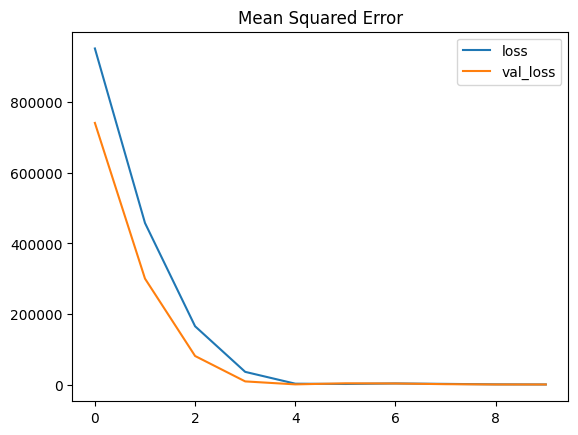

In [29]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title('Mean Squared Error')
plt.legend()

plt.show()

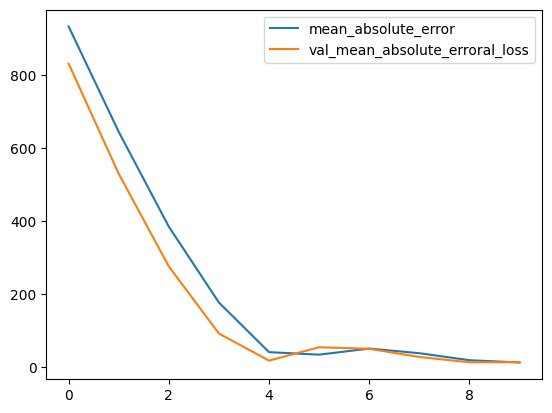

In [30]:
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_erroral_loss')

plt.legend()

plt.show()

# Model with 1 hidden layer

Including a dense layer with 10 units and relu activation.

In [57]:
n_features_in = len(x_train.select_dtypes("number").columns)
input_shape = (1, n_features_in)
input_shape

(1, 39)

In [58]:
model = tf.keras.Sequential()
model.add(keras.layers.InputLayer(input_shape))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 1, 10)          │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1, 1)           │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411 (1.61 KB)

 Trainable params: 411 (1.61 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError()
    ],
)

In [60]:
history = model.fit(
    x=tf.expand_dims(x_train.select_dtypes('number').values, axis=1),
    y=y_train.values,
    batch_size=30,
    epochs=10,
    verbose="auto",
    validation_split=0.2,
    shuffle=True
)

Epoch 1/10


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 12902.0146 - mean_absolute_error: 107.8179 - val_loss: 1080.5297 - val_mean_absolute_error: 31.2942
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 708.1176 - mean_absolute_error: 22.8765 - val_loss: 1299.3708 - val_mean_absolute_error: 31.0444
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1066.3955 - mean_absolute_error: 26.8098 - val_loss: 977.2023 - val_mean_absolute_error: 26.4788
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 497.1327 - mean_absolute_error: 17.5278 - val_loss: 161.1719 - val_mean_absolute_error: 10.5392
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 214.9777 - mean_absolute_error: 12.1348 - val_loss: 193.7035 - val_mean_absolute_error: 11.2519
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 239.0430 - mean_absolute_error: 12.8116 - val_loss: 174.4709 - val_mean_absolute_error: 10.9910
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 178.6254 - mean_absolute_error: 10.8

In [61]:
model.evaluate(
    tf.expand_dims(x_test.select_dtypes('number').values, axis=1),
    y_test.values
)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 168.5031 - mean_absolute_error: 10.7574 


[173.34144592285156, 10.98048210144043]

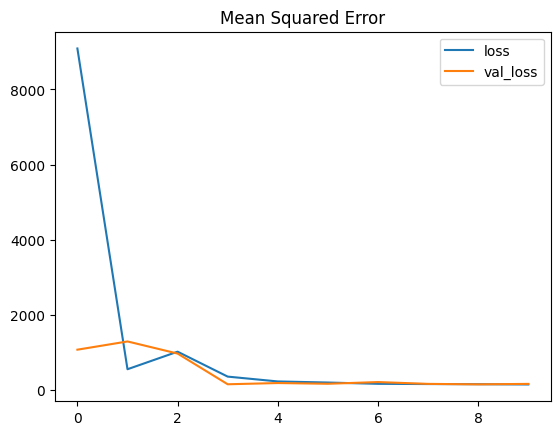

In [62]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title('Mean Squared Error')
plt.legend()

plt.show()

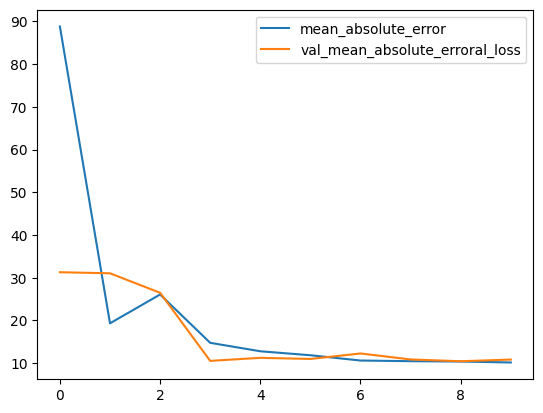

In [63]:
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_erroral_loss')

plt.legend()

plt.show()

# Model with 4 hidden layer

Including four dense layers with 32 units and relu activation each.

In [84]:
n_features_in = len(x_train.select_dtypes("number").columns)
input_shape = (1, n_features_in)
input_shape

(1, 39)

In [130]:
model = tf.keras.Sequential()
model.add(keras.layers.InputLayer(input_shape))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_61 (Dense)                │ (None, 1, 64)          │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1, 1)           │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,105 (59.00 KB)

 Trainable params: 15,105 (59.00 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError()
    ],
)

In [132]:
history = model.fit(
    x=tf.expand_dims(x_train.select_dtypes('number').values, axis=1),
    y=y_train.values,
    batch_size=30,
    epochs=10,
    verbose="auto",
    validation_split=0.2,
    shuffle=True
)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 8780.5234 - mean_absolute_error: 88.8614 - val_loss: 681.5099 - val_mean_absolute_error: 24.7840
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 393.7824 - mean_absolute_error: 16.6743 - val_loss: 837.8780 - val_mean_absolute_error: 25.1894
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 691.2413 - mean_absolute_error: 22.2125 - val_loss: 630.8489 - val_mean_absolute_error: 21.4494
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 304.2632 - mean_absolute_error: 13.9963 - val_loss: 103.3709 - val_mean_absolute_error: 8.1493
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 133.2660 - mean_absolute_error: 9.3045 - val_loss: 138.1086 - val_mean_absolute_error: 9.0890
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 147.0990 - mean_absolute_error: 9.6961 - val_loss: 116.1025 - val_mean_absolute_error: 8.9172
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 104.1981 - mean_absolute_error: 8

In [133]:
model.evaluate(
    tf.expand_dims(x_test.select_dtypes('number').values, axis=1),
    y_test.values
)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 96.4683 - mean_absolute_error: 7.9239 


[104.91600036621094, 8.293561935424805]

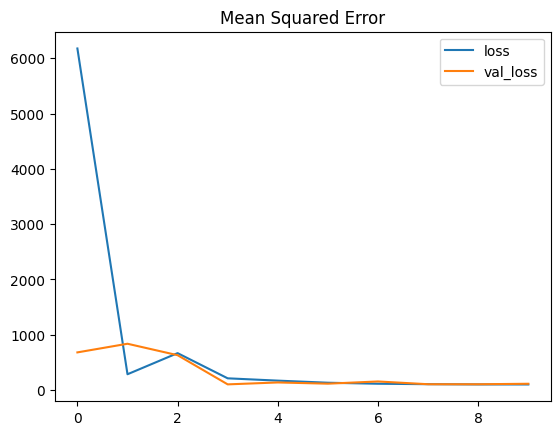

In [134]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title('Mean Squared Error')
plt.legend()

plt.show()

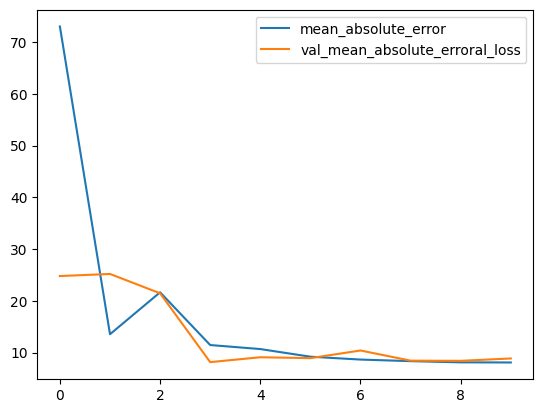

In [135]:
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_erroral_loss')

plt.legend()

plt.show()

# Model with 4 hidden layers and features normalization

In [156]:
normalization = keras.layers.Normalization(axis=-1)
normalization.adapt(x_train.values)

In [157]:
model = tf.keras.Sequential()
model.add(keras.layers.InputLayer(input_shape))
model.add(normalization)
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_7 (Normalization) │ (None, 1, 39)          │            79 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 1, 64)          │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 1, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 1, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 1, 1)           │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,184 (59.32 KB)

 Trainable params: 15,105 (59.00 KB)

 Non-trainable params: 79 (320.00 B)

In [158]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError()
    ],
)

In [159]:
history = model.fit(
    x=tf.expand_dims(x_train.select_dtypes('number').values, axis=1),
    y=y_train.values,
    batch_size=30,
    epochs=50,
    verbose="auto",
    validation_split=0.2,
    shuffle=True
)

Epoch 1/50


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 598.6398 - mean_absolute_error: 23.2507 - val_loss: 508.3743 - val_mean_absolute_error: 21.0257
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 553.9353 - mean_absolute_error: 22.2426 - val_loss: 412.4940 - val_mean_absolute_error: 18.5609
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 444.8108 - mean_absolute_error: 19.3220 - val_loss: 243.9016 - val_mean_absolute_error: 13.1714
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 226.1261 - mean_absolute_error: 12.6514 - val_loss: 119.4997 - val_mean_absolute_error: 8.4121
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 127.7869 - mean_absolute_error: 8.8002 - val_loss: 115.6018 - val_mean_absolute_error: 8.4289
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 106.9855 - mean_absolute_error: 8.0826 - val_loss: 92.6384 - val_mean_absolute_error: 7.5028
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 99.8278 - mean_absolute_error: 7.8593 - val_los

In [160]:
model.evaluate(
    tf.expand_dims(x_test.select_dtypes('number').values, axis=1),
    y_test.values
)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 53.6340 - mean_absolute_error: 6.2095  


[57.65906524658203, 6.34425163269043]

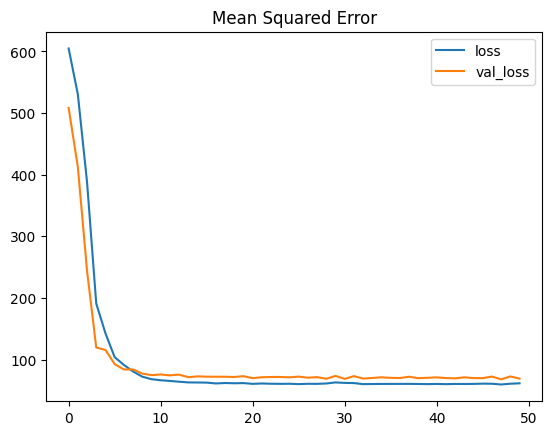

In [161]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title('Mean Squared Error')
plt.legend()

plt.show()

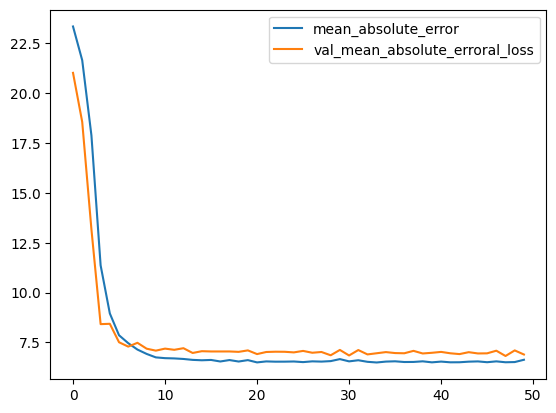

In [162]:
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_erroral_loss')

plt.legend()

plt.show()